In [77]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [64]:
def divided_Diferences(points, predict_x):
    coefficients_matrix = np.zeros((len(points), len(points)+1))
    total = points[0][1]
    polinom = predict_x - points[0][0]
    for i in range(len(points)):
        coefficients_matrix[i][0] = points[i][0]
        coefficients_matrix[i][1] = points[i][1]
    for i in range(1, len(points)):
        for j in range(2, i+2):
            coefficients_matrix[i][j] = ( coefficients_matrix[i][j-1] - coefficients_matrix[i-1][j-1] ) / (coefficients_matrix[i][0] - coefficients_matrix[i-(j-1)][0])
    for i in range(1, (len(points))):
        total +=  coefficients_matrix[i, i+1]*polinom
        polinom *= (predict_x -  coefficients_matrix[i][0])
    return total 

In [65]:
def lagrange(points, predict_x):
    points = list(zip(*points))
    xpoints = points[0]
    ypoints = points[1]
    dividers = []
    results=[]
    dividers.append(xpoints[0]- xpoints[1])
    for i in range(2, len(xpoints)):
         dividers[0] *= xpoints[0] - xpoints[i]
    for i in range(1, len(xpoints)):
        dividers.append(xpoints[i]-xpoints[0])
        for j in range(1, len(xpoints)):
            dividers[i] *= (xpoints[i] - xpoints[j] )if i != j else 1
    numerator =  predict_x - xpoints[1]
    for i in range(2, len(xpoints)):
         numerator *= predict_x - xpoints[i]
    results.append(numerator * ypoints[i] / dividers[i])
    for i in range(1, len(xpoints)):
        numerator = predict_x - xpoints[0]
        for j in range(1, len(xpoints)):
            numerator *= (predict_x - xpoints[j]) if i != j else 1
        results.append(numerator * ypoints[i] / dividers[i])
    return sum(results)
        

In [80]:
def ranges_to_tuples(s: str):
    results = []
    s = s[3:]
    lines = s.split("\n")
    for line in lines:
        line = line[:-1]
        div = line.split(',')
        temp = div[0].split('<')
        elements = tuple(map(float, (temp[0], temp[-1], div[-1])))
        results.append(elements)
    return results

In [168]:
predictX = 4.5
results = []
for song in songs:
    results.append((divided_Diferences(song, predictX), lagrange(song, predictX)))
results

[(448.4675258803365, 448.39700816988943),
 (388.47581300375873, 388.4609877623588),
 (194346029.76090154, 194346031.16019)]

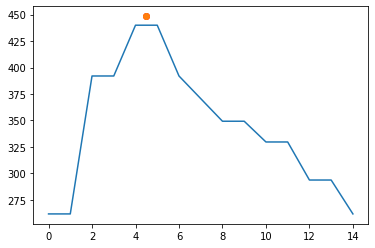

In [169]:
coordinates = list(zip(*songs[0]))
plt.plot(coordinates[0], coordinates[1])
plt.plot(predictX, results[0][0], 'ro')
plt.plot(predictX, results[0][1], 'o')

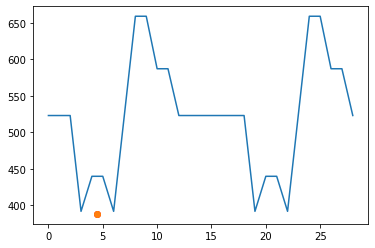

In [170]:
coordinates = list(zip(*songs[1]))
plt.plot(coordinates[0], coordinates[1])
plt.plot(predictX, results[1][0], 'ro')
plt.plot(predictX, results[1][1], 'o')

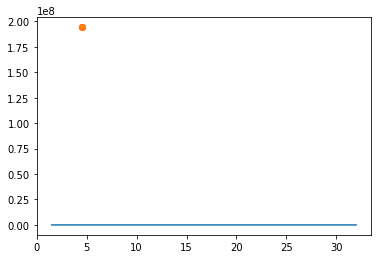

In [171]:
coordinates = list(zip(*songs[2]))
plt.plot(coordinates[0], coordinates[1])
plt.plot(predictX, results[2][0], 'ro')
plt.plot(predictX, results[2][1], 'o')